## Calculo de la eficiencia al interpolar un sistema de puntos

Vamos a generar un conjunto  $50$ puntos y mediremos el tiempo que demora cada metodo en hallar los coeficientes y graficar el polinomio de interpolacion.

In [2]:
"""
Implementacion del metodo de newton
"""
import numpy as np

def newton(x, y):
    """
    Calcula los coeficientes del polinomio de interpolacion
    mediante el metodo de interpolacion de newton
    """
    n = np.shape(x)[0]
    c = np.array([y[0]])  # coeficientes del polinomio de interpolacion
    
    for k in range(1, n):
        d = x[k] - x[k-1]
        u = c[k-1]
        for i in range(k-2, -1, -1):
            u = u*(x[k] - x[i]) + c[i]
            d *= x[k] - x[i]
        c = np.append(c, (y[k]-u)/d)

    return c

In [4]:
"""
Implementacion del metodo de diferencia divididas
"""
import numpy as np

def difdiv(x, y):
    nrow = np.shape(y)[0]
    c = np.zeros((nrow, nrow))
    c[:,0] = y

    for j in range(1, nrow):
        for i in range(nrow-j):
            c[i,j] = (c[i+1, j-1] - c[i,j-1])/(x[i+j]-x[i])

    return c[0,:]   #coeficientes del polinomio de interpolacion

In [7]:
"""
Evaluacion del polinomio de interpolacion
"""

def eval_poli(x, c, x0): # c: coeficientes, x0: punto a evaluar el polinomio
    n = np.shape(x)[0]
    u  = c[-1]	#u: evaluacion de p en x0
    for i in range(n-1,-1,-1):
        u = u*(x0-x[i]) + c[i]

    return u


In [5]:
"""
Grafica del polinomio de interpolacion
"""
import numpy as np
import matplotlib.pyplot as plt

def grafpoli(x, y, metodo):	# metodo: calcula los coeficientes del polinomio de interolacion este puede ser diferencias divididas o algoritmo de newton

    c = metodo(x, y)
    x0 = np.linspace(min(x), max(x), 10000)
    px = np.array([])
    for a  in x0:
        px = np.append(px, eval_poli(x, c, a))

    plt.plot(x0, px, label="Polinomio de interpolacion")
    plt.plot(x, y, 'o',label="Puntos interpolados")
    plt.title("Polinomio de interpolacion de la forma de Newton.")
    plt.grid()
    plt.legend()
    plt.show()

### Análisis de eficiencia de los métodos de interpolación

In [26]:
import numpy as np
import random as rdm

NUM_PUNTOS = 5
x1, x2 = -100, 100
y1, y2 = -500, 500

# crea NUM_PUNTOS puntos en el eje x e y, donde x in [x1, x2] and y in [y1, y2]
x = np.array([rdm.uniform(x1, x2) for k in range(NUM_PUNTOS)])
y = np.array([rdm.uniform(y1, y2) for k in range(NUM_PUNTOS)])

# Muestra los 50 par de puntos aleatorios 
print("x: \n\n {}\n-------------\ny: \n\n {}".format(x, y))


x: 

 [ 37.74964646  45.61405985 -65.37283841  11.5012367   77.02581724]
-------------
y: 

 [-261.28722138 -248.87803108  -61.57197054  -47.87322081  217.88996243]


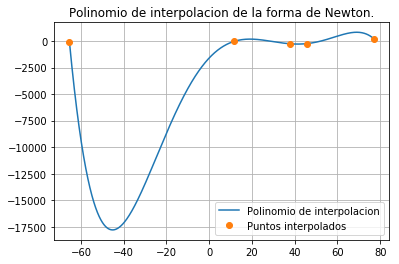

El tiempo empleado por el metodo de newton es:  0.20952892303466797


In [27]:
import time

# calculos de coeficientes y ploteo por el metodo de newton

tnew = time.time()

cnew = newton(x, y)
grafpoli(x, y, newton)

print("El tiempo empleado por el metodo de newton es: ", time.time()-tnew)

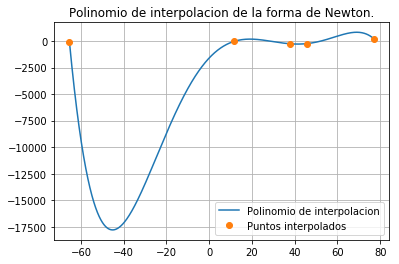

El tiempo empleado por el metodo de diferencias divididas es:  0.20763754844665527


In [28]:
import time

# calculos de coeficientes y ploteo por el metodo de newton

tdif= time.time()

cdif = difdiv(x, y)
grafpoli(x, y, difdiv)

print("El tiempo empleado por el metodo de diferencias divididas es: ", time.time()-tdif)